In [ ]:
import pandas as pd

df = pd.read_csv('MonthlyUsageandDemand.csv')
display(df.head())
print(df.shape)

#Drop the unnamed columns
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
print("\nData after dropping unnamed columns:\n", df.head())

,Identifier,Usage,Demand,YrMo,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,643844,40,0.32,202405,NaN,NaN,NaN
1,643844,32,0.54,202406,NaN,NaN,NaN
2,643844,36,0.28,202407,NaN,NaN,NaN
3,643844,51,0.32,202408,NaN,NaN,NaN
4,643844,80,0.83,202409,NaN,NaN,NaN


(210237, 7)

Data after dropping unnamed columns:
    Identifier  Usage  Demand    YrMo
0      643844     40    0.32  202405
1      643844     32    0.54  202406
2      643844     36    0.28  202407
3      643844     51    0.32  202408
4      643844     80    0.83  202409


In [ ]:
# Data Cleaning

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)

# Descriptive statistics
print("\nUsage and Demand Statistics:\n", df[['Usage', 'Demand']].describe())

# Analyze and Convert 'YrMo' column
df['YrMo'] = pd.to_datetime(df['YrMo'], format='%Y%m')
print("\n'YrMo' after conversion:\n", df['YrMo'].head())


Missing Values:
 Identifier    0
Usage         0
Demand        0
YrMo          0
dtype: int64

Usage and Demand Statistics:
                Usage         Demand
count  210237.000000  210237.000000
mean      796.432398       6.307085
std       774.283960       4.431463
min         0.000000       0.000000
25%       214.000000       2.740000
50%       624.000000       6.100000
75%      1189.000000       9.380000
max     14759.000000     106.410000

'YrMo' after conversion:
 0   2024-05-01
1   2024-06-01
2   2024-07-01
3   2024-08-01
4   2024-09-01
Name: YrMo, dtype: datetime64[ns]


In [ ]:
# Investigate 'Identifier' column
print("\nNumber of unique identifiers:", df['Identifier'].nunique())
print("\nIdentifier frequency distribution:\n", df['Identifier'].value_counts().head(10))


Number of unique identifiers: 15610

Identifier frequency distribution:
 Identifier
3613744    52
8372452    52
5088742    52
8439454    52
4560247    52
8375952    52
4447543    52
7501854    52
4564947    52
8936042    52
Name: count, dtype: int64


Usage                                   Demand          \
                   mean median          std min    max      mean  median   
YrMo                                                                       
2024-05-01   671.639914  594.0   619.196245   0   9679  6.266973  6.0800   
2024-06-01   648.596522  476.0   610.464021   0  11400  6.079789  5.9800   
2024-07-01   769.199220  578.5   699.431184   0  12778  6.528409  6.3700   
2024-08-01   846.403930  628.5   763.404341   0  12088  6.855514  6.7000   
2024-09-01   799.118105  611.0   714.318683   0  12649  7.044981  6.8700   
2024-10-01   686.105040  541.0   618.823123   0  11536  6.718575  6.4810   
2024-11-01   672.956268  608.0   601.153776   0  11526  6.495843  6.2400   
2024-12-01   808.344505  736.0   762.481058   0  10977  6.493735  6.2495   
2025-01-01   976.109429  844.0   950.704436   0  12691  4.434239  2.5090   
2025-02-01  1037.929573  841.0  1056.417252   0  14759  5.852334  5.4700   
2025-03-01   881.988209  701.0   901.280977   0  11814  6.552197  6.1600   
2025-04-01   807.343913  673.0   778.993539   0  10814  6.457103  6.0810   
2025-05-01   711.114411  574.0   670.877916   0  10118  6.223230  5.9500   

                                    
                 std  min      max  
YrMo                                
2024-05-01  4.168386  0.0   38.520  
2024-06-01  4.153360  0.0   36.000  
2024-07-01  4.249997  0.0  106.410  
2024-08-01  4.162161  0.0   35.410  
2024-09-01  3.980301  0.0   35.000  
2024-10-01  3.935833  0.0   43.000  
2024-11-01  3.968392  0.0   41.010  
2024-12-01  4.317806  0.0   37.260  
2025-01-01  5.009274  0.0   44.000  
2025-02-01  4.919187  0.0   39.480  
2025-03-01  4.853424  0.0   63.685  
2025-04-01  4.784404  0.0   74.208  
2025-05-01  4.224210  0.0   34.300


Correlation between Usage and Demand: 0.6687830505084097


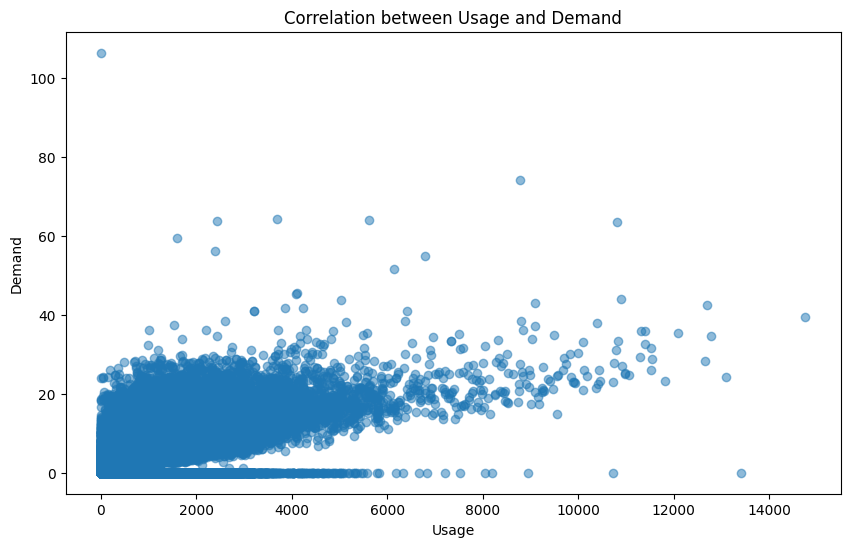

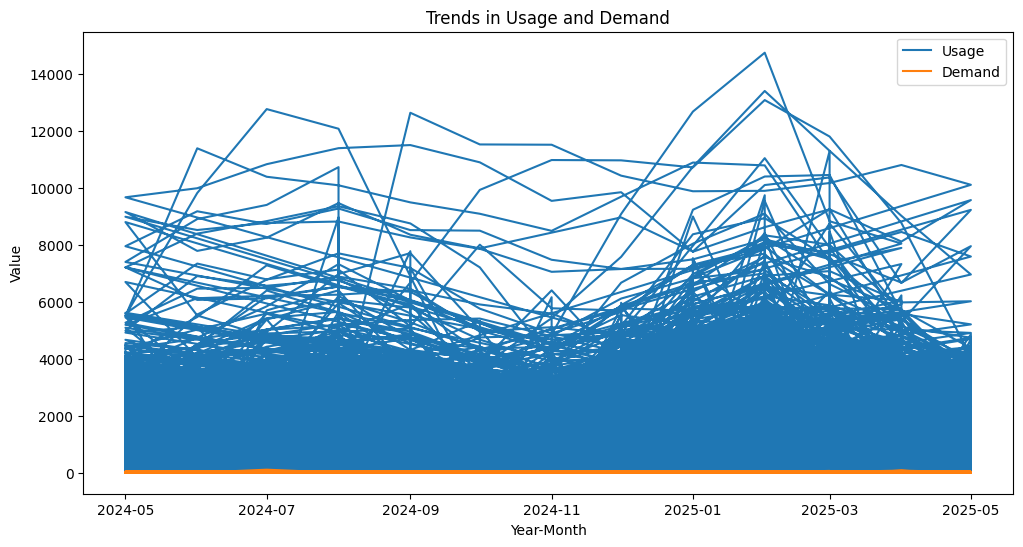

,Usage,Demand
count,15610.000000,15610.000000
mean,783.821463,6.239784
std,666.589975,3.614633
min,4.928571,0.000000
25%,234.725000,3.327458
50%,886.258242,5.945192
75%,1168.807692,8.851442
max,9777.615385,32.500000


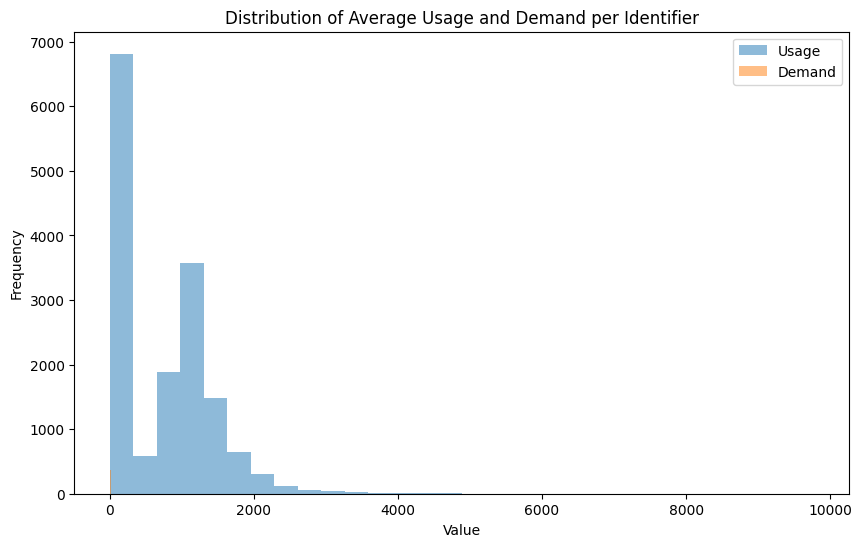

In [ ]:
#Analysis and Visualization

import matplotlib.pyplot as plt

# Descriptive statistics grouped by 'YrMo'
descriptive_stats = df.groupby('YrMo')[['Usage', 'Demand']].agg(['mean', 'median', 'std', 'min', 'max'])
display(descriptive_stats)

# Correlation between 'Usage' and 'Demand'
correlation = df['Usage'].corr(df['Demand'])
print(f"\nCorrelation between Usage and Demand: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Usage'], df['Demand'], alpha=0.5)  # Adjust alpha for better visualization
plt.xlabel('Usage')
plt.ylabel('Demand')
plt.title('Correlation between Usage and Demand')
plt.show()


# Trend analysis using rolling averages
rolling_window = 3  # Adjust window size as needed
df['Rolling_Usage'] = df['Usage'].rolling(window=rolling_window, center=True).mean()
df['Rolling_Demand'] = df['Demand'].rolling(window=rolling_window, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['YrMo'], df['Usage'], label='Usage')
plt.plot(df['YrMo'], df['Demand'], label='Demand')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Trends in Usage and Demand')
plt.legend()
plt.show()

# Relationship with 'Identifier'
identifier_stats = df.groupby('Identifier')[['Usage', 'Demand']].mean()
display(identifier_stats.describe())

plt.figure(figsize=(10, 6))
plt.hist(identifier_stats['Usage'], bins=30, alpha=0.5, label='Usage')
plt.hist(identifier_stats['Demand'], bins=30, alpha=0.5, label='Demand')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Usage and Demand per Identifier')
plt.legend()
plt.show()

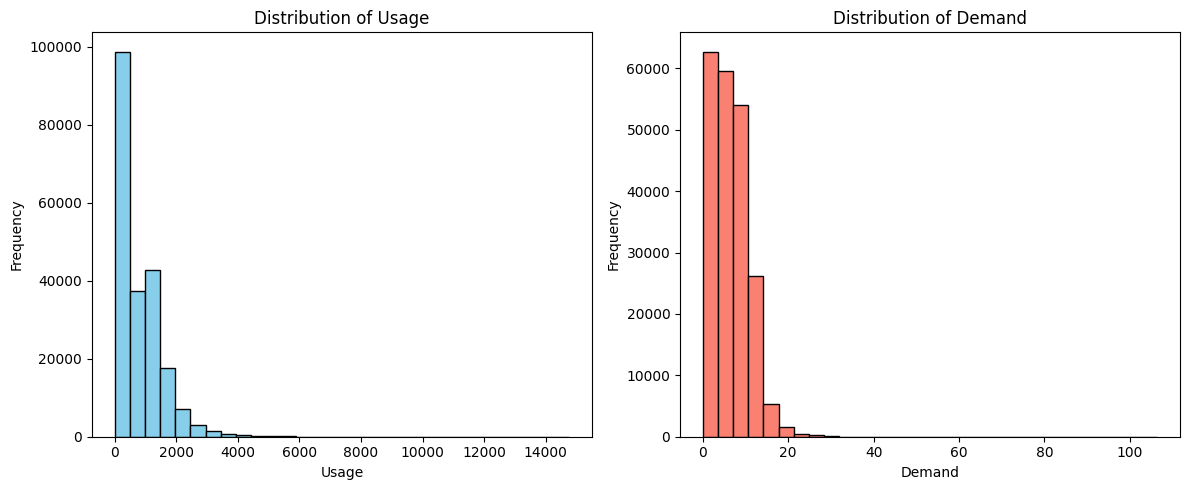

<ipython-input-10-affe8b47aaac>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Usage'], df['Demand']], labels=['Usage', 'Demand'], patch_artist=True,


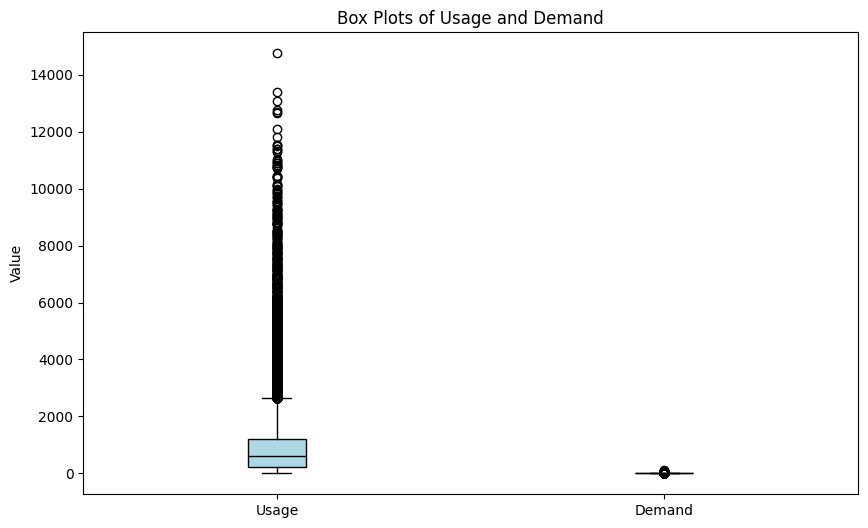

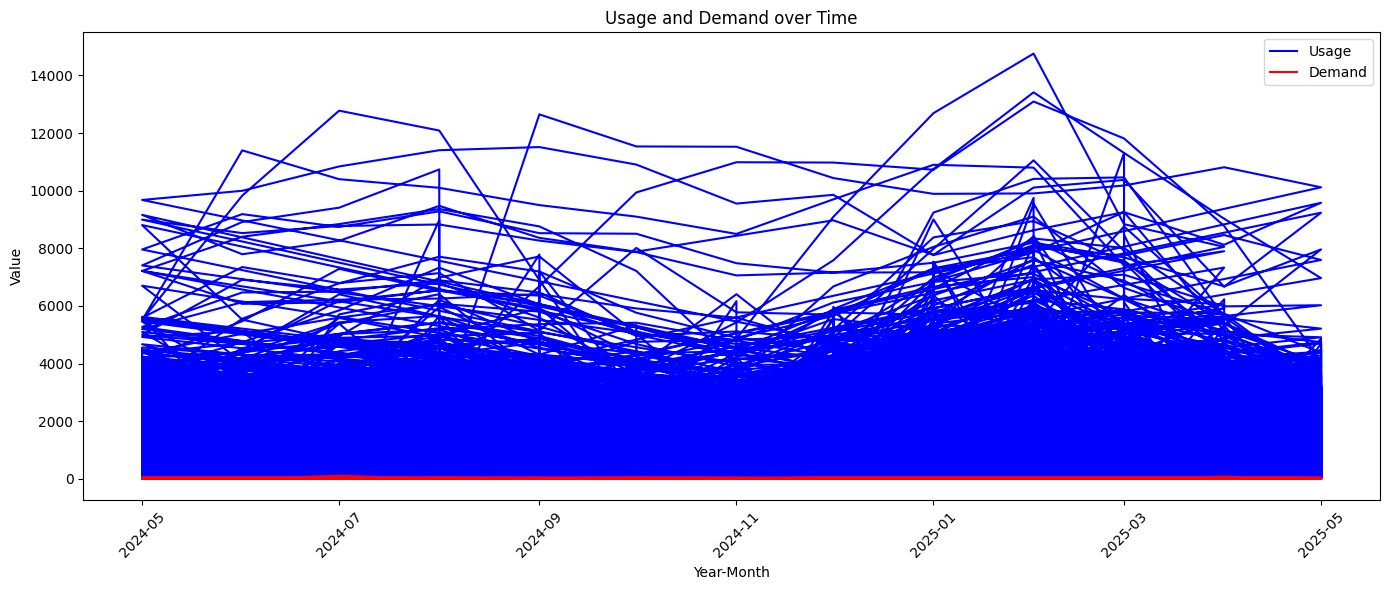

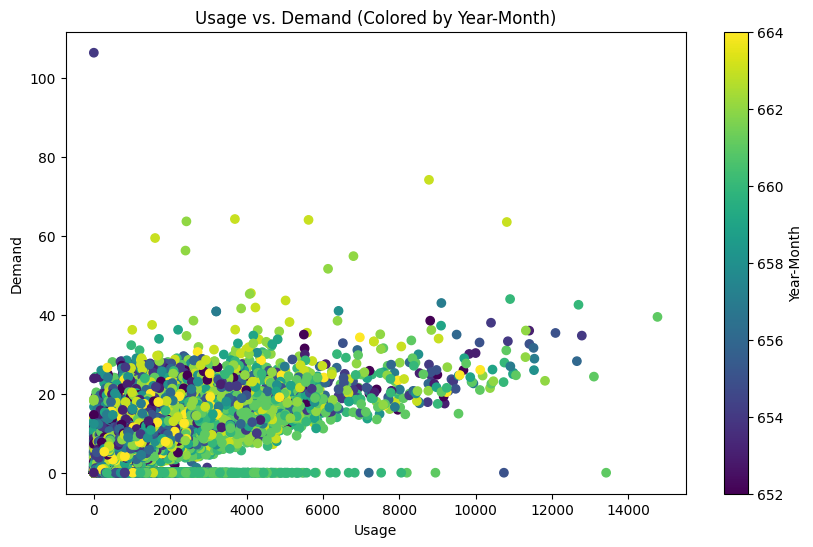

In [ ]:
import matplotlib.pyplot as plt

# Histograms for 'Usage' and 'Demand'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Usage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.title('Distribution of Usage')

plt.subplot(1, 2, 2)
plt.hist(df['Demand'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Demand')
plt.tight_layout()
plt.show()

# Box plots for 'Usage' and 'Demand'
plt.figure(figsize=(10, 6))
plt.boxplot([df['Usage'], df['Demand']], labels=['Usage', 'Demand'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.ylabel('Value')
plt.title('Box Plots of Usage and Demand')
plt.show()

# Line charts for 'Usage' and 'Demand' over time
plt.figure(figsize=(14, 6))
plt.plot(df['YrMo'], df['Usage'], label='Usage', color='blue')
#plt.plot(df['YrMo'], df['Rolling_Usage'], label='Rolling Avg. Usage', color='skyblue', linestyle='--')
plt.plot(df['YrMo'], df['Demand'], label='Demand', color='red')
#plt.plot(df['YrMo'], df['Rolling_Demand'], label='Rolling Avg. Demand', color='salmon', linestyle='--')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Usage and Demand over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of 'Usage' vs. 'Demand', colored by 'YrMo'
plt.figure(figsize=(10, 6))
plt.scatter(df['Usage'], df['Demand'], c=df['YrMo'].dt.to_period('M').astype(int), cmap='viridis') # Color by month
plt.xlabel('Usage')
plt.ylabel('Demand')
plt.title('Usage vs. Demand (Colored by Year-Month)')
plt.colorbar(label='Year-Month')
plt.show()

In [ ]:
# Averages by Identifier

average_by_identifier = df.groupby('Identifier')[['Usage', 'Demand']].mean()
display(average_by_identifier)

,Usage,Demand
Identifier,,
643844,185.538462,0.942308
1431143,1155.000000,4.702308
3003859,969.250000,6.537500
3005343,949.923077,7.676154
3005643,903.714286,3.946500
...,...,...
9001242,317.923077,5.515385
9001443,1968.230769,8.102308
9001543,1092.583333,8.741667


,Usage,Demand
Month,,
1,976.109429,4.434239
2,1037.929573,5.852334
3,881.988209,6.552197
4,807.343913,6.457103
5,688.984598,6.247753
6,648.596522,6.079789
7,769.199220,6.528409
8,846.403930,6.855514
9,799.118105,7.044981


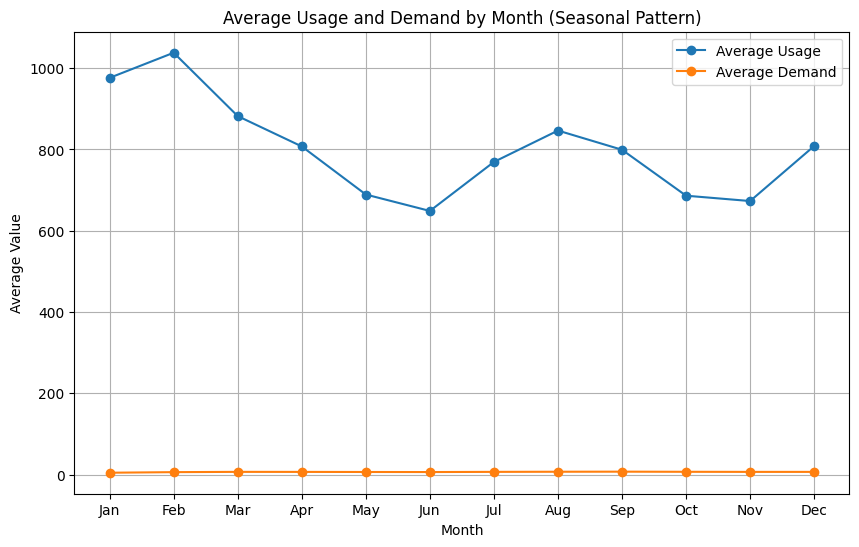

In [ ]:
# Usage by Month

import matplotlib.pyplot as plt
# Extract the month from the 'YrMo' column
df['Month'] = df['YrMo'].dt.month

# Group by 'Month' and calculate the mean Usage and Demand
monthly_seasonal_pattern = df.groupby('Month')[['Usage', 'Demand']].mean()

# Display the results
display(monthly_seasonal_pattern)

# Visualize the seasonal pattern
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonal_pattern.index, monthly_seasonal_pattern['Usage'], marker='o', label='Average Usage')
plt.plot(monthly_seasonal_pattern.index, monthly_seasonal_pattern['Demand'], marker='o', label='Average Demand')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Average Usage and Demand by Month (Seasonal Pattern)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

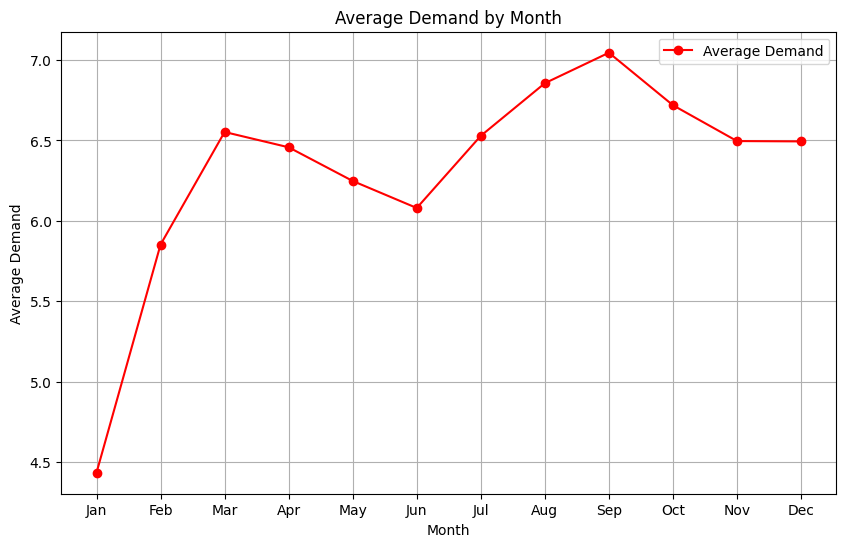

In [ ]:
# Demand by Month

import matplotlib.pyplot as plt
# Visualize the demand by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonal_pattern.index, monthly_seasonal_pattern['Demand'], marker='o', label='Average Demand', color='red')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Top identifiers based on average usage and demand
top_identifiers_usage = average_by_identifier.sort_values(by='Usage', ascending=False).head(10)
top_identifiers_demand = average_by_identifier.sort_values(by='Demand', ascending=False).head(10)

print("\nTop 10 Identifiers by Average Usage:\n")
display(top_identifiers_usage)

print("\nTop 10 Identifiers by Average Demand:\n")
display(top_identifiers_demand)


Top 10 Identifiers by Average Usage:



,Usage,Demand
Identifier,,
6951453,9777.615385,27.200000
4818245,9705.642857,26.129571
5578243,9266.666667,32.500000
8483654,8654.307692,20.258462
3665657,8141.692308,16.816154
6498054,7961.692308,23.237692
3852645,7472.285714,21.813857
6072655,7390.000000,26.226154
3375144,6715.250000,18.037500



Top 10 Identifiers by Average Demand:



,Usage,Demand
Identifier,,
5578243,9266.666667,32.500000
6951453,9777.615385,27.200000
5732043,6586.166667,26.592500
6072655,7390.000000,26.226154
7215059,5931.769231,26.203077
4818245,9705.642857,26.129571
8647753,3126.833333,26.069167
6274753,4307.000000,25.390769
5571643,1263.583333,24.515000
